<a href="https://colab.research.google.com/github/edebolt85/PythonFinalProject/blob/main/FinalProject_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract
import shutil
import os
import random
from PIL import Image
import spacy
import pandas
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import regex as re
import glob


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


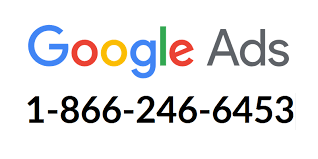

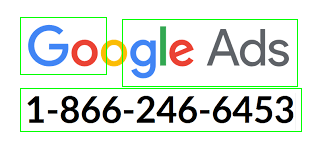

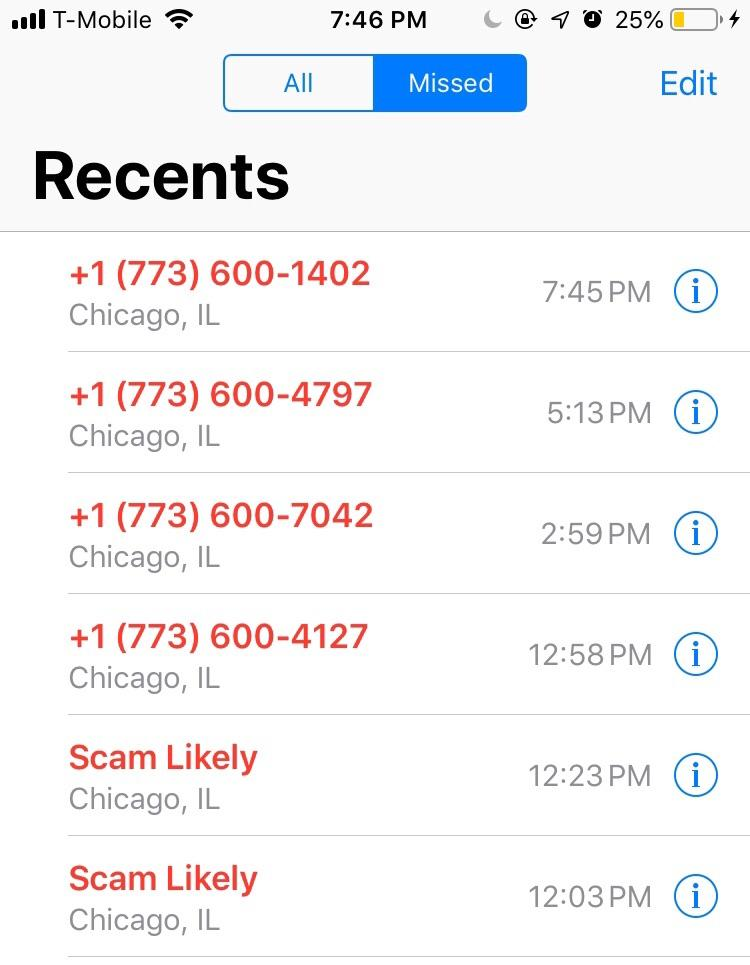

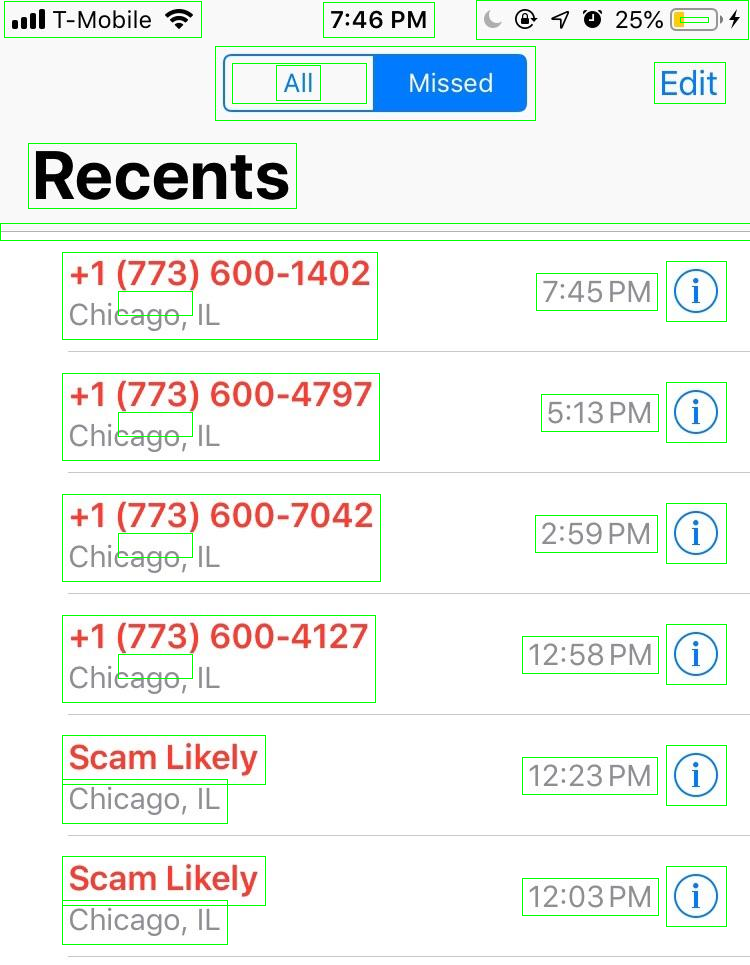

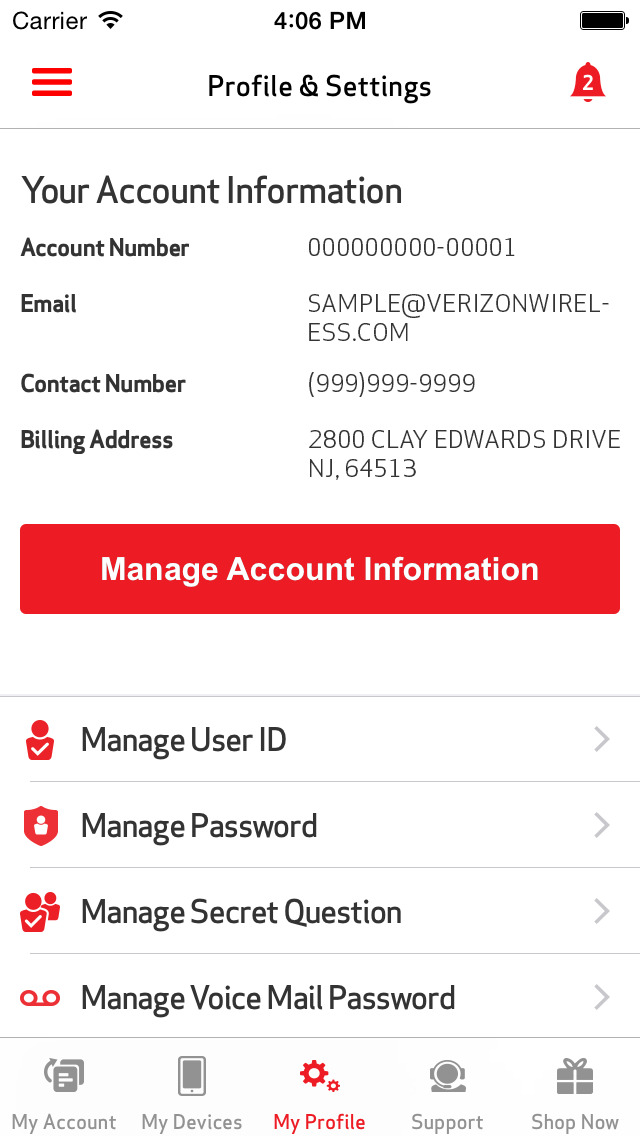

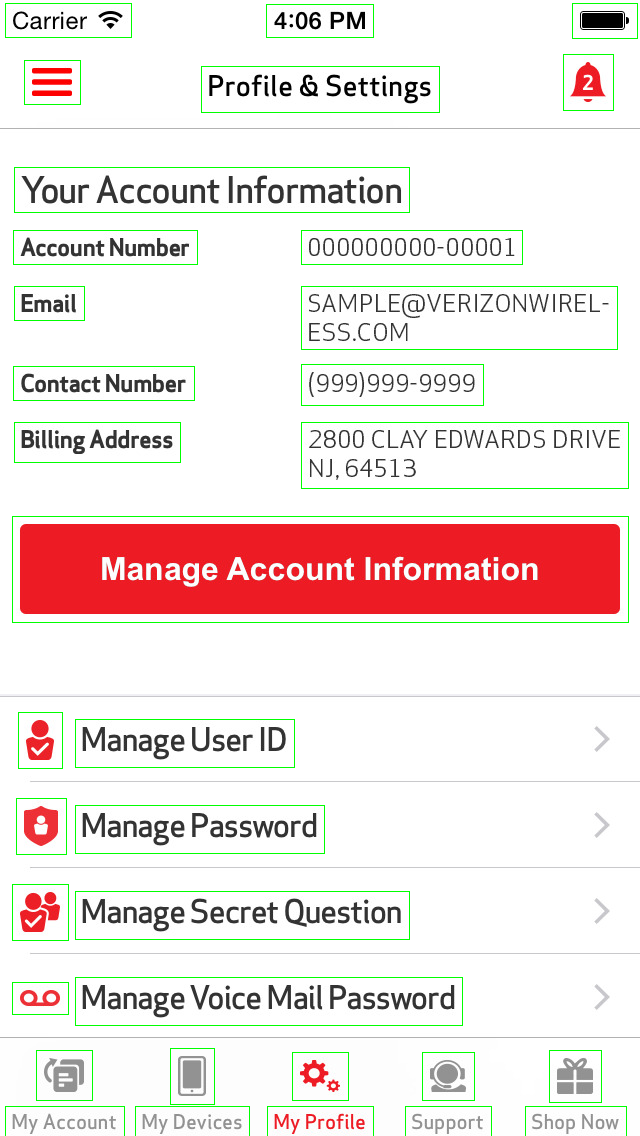

In [6]:
image_dir = "/images"
images = glob.glob(image_dir + '/*.*')

nlp = spacy.load('en_core_web_sm')


for file in images:
  original = cv2.imread(file)
  image = cv2.imread(file)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  inverted_thresh = 255 - thresh
  dilate = cv2.dilate(inverted_thresh, kernel, iterations=4)
  cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  text = pytesseract.image_to_data(image, output_type='data.frame')
  text = text[text.conf != -1]
  lines = text.groupby('block_num')['text'].apply(list)
  conf = text.groupby(['block_num'])['conf'].mean()
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
    x,y, w, h = cv2.boundingRect(c)
    ROI = thresh[y:y + h, x:x + w]
    data = pytesseract.image_to_string(ROI, lang='eng', config='--psm 6')
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 0)
    
        # print(data)
        # print(conf)

    #if re.search(r"(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})", data):
    # cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
    # cv2.putText(image, "Phone Number", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    # print(data, conf)

        # if re.search(r"^(\w|\.|\_|\-)+[@](\w|\_|\-|\.)+[.]\w{2,3}$", data):
        # cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
        # cv2.putText(image, "Email Address", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        # if re.search(r"^(?!000|666)[0-8][0-9]{2}-(?!00)[0-9]{2}-(?!0000)[0-9]{4}", data):
        # cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
        # cv2.putText(image, "SSN", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)  

        # if re.search(r"(^|\s+)(\d{4}[ -]\d{4}[ -]\d{4}[ -]\d{4})(?:\s+|$)", data):
        # cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
        # cv2.putText(image, "CC", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        # print(conf, lines)
  cv2_imshow(original)
  cv2_imshow(image)

In [ ]:
from google.colab import files
uploaded = files.upload()


# uploaded = files.upload()
#original = cv2.imread("/content/callhistory.jpg")
#image = cv2.imread("/content/callhistory.jpg")
# image = cv2.imread("cc.png")
# image = cv2.imread("acct.jpeg")

image_path_in_colab="/content/some_image.jpg"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

    for word in accounts:
        if word in data:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
            cv2.putText(image, "Account Data", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    for word in email:
        if word in data:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
            cv2.putText(image, "Email Address", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    for word in address:
        if word in data:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
            cv2.putText(image, "Home/Personal Address", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    for word in phone:
        if word in data:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),-1)
            cv2.putText(image, "Phone Number", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)